In [ ]:
import pandas as pd
store_data_path = '/content/store_data.csv'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder

file_path = '/content/store_data.csv'

store_df = pd.read_csv(file_path, header = None)

store_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
transactions = []
for i in range(len(store_df)):
    transaction = [str(item) for item in store_df.iloc[i] if pd.notna(item)]
    transactions.append(transaction)

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

df = pd.DataFrame(te_ary, columns = te.columns_)
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


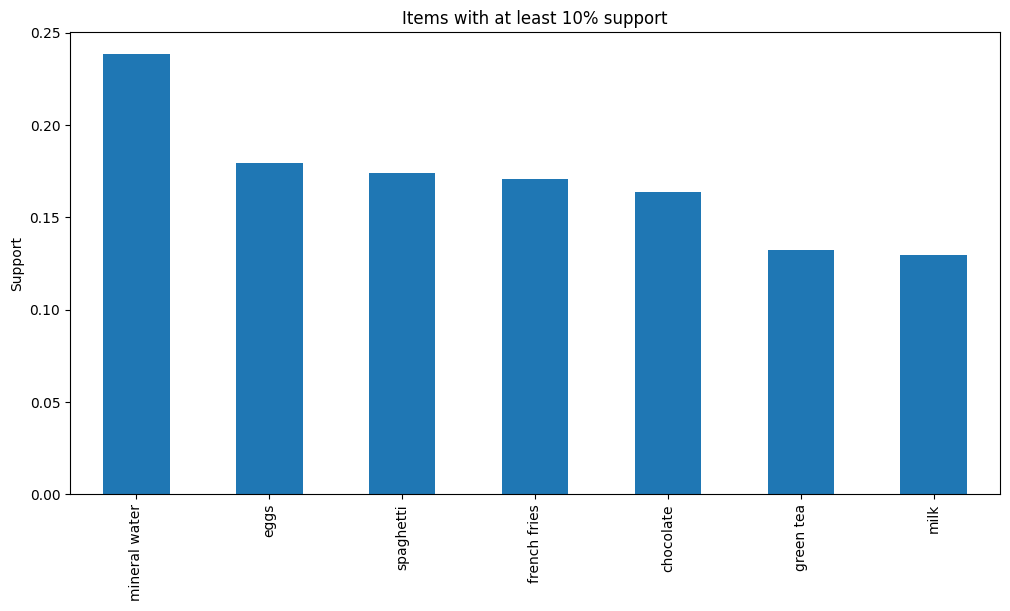

In [ ]:
item_support = df.mean()

high_support_items = item_support[item_support >= 0.1].sort_values(ascending = False)

plt.figure(figsize = (12,6))
high_support_items.plot(kind = 'bar')
plt.ylabel('Support')
plt.title("Items with at least 10% support")
plt.show()

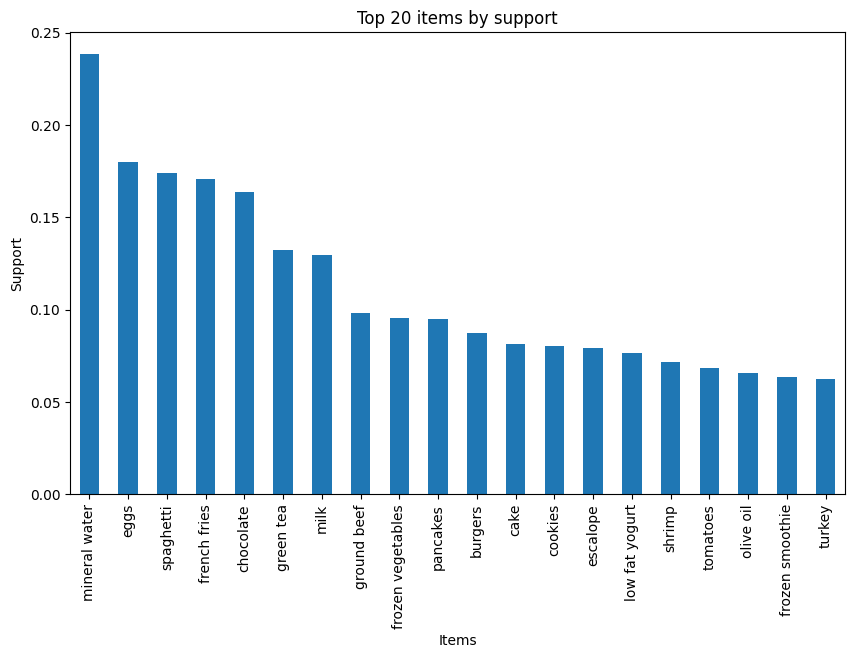

In [ ]:
top_20_items = item_support.sort_values(ascending = False)[:20]

plt.figure(figsize = (10, 6))
top_20_items.plot(kind = 'bar')
plt.title('Top 20 items by support')
plt.ylabel('Support')
plt.xlabel('Items')
plt.xticks(rotation = 90)
plt.show()

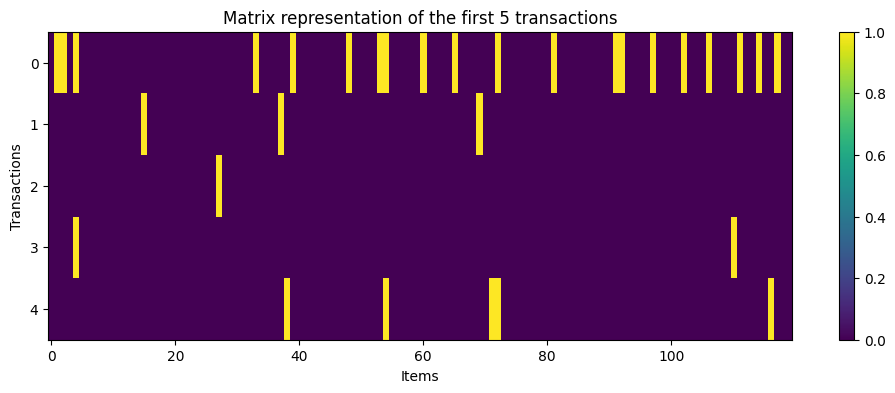

In [ ]:
first_5_transactions = df.iloc[0:5]

plt.figure(figsize = (12, 4))
plt.imshow(first_5_transactions, cmap = 'viridis', aspect = 'auto')
plt.colorbar()
plt.title('Matrix representation of the first 5 transactions')
plt.ylabel("Transactions")
plt.xlabel("Items")
plt.show()

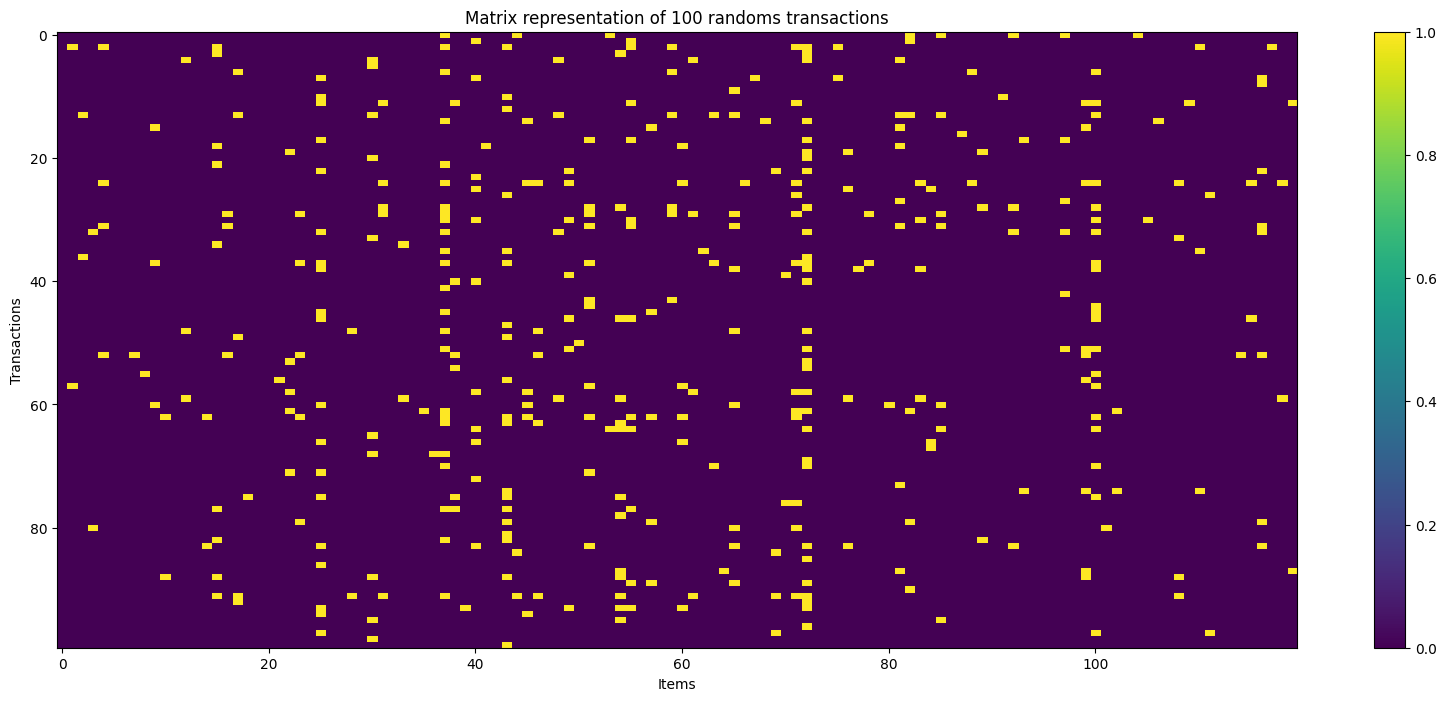

In [ ]:
import numpy as np

sampled_df = df.sample(n = 100, random_state = 1)

plt.figure(figsize = (20, 8))
plt.imshow(sampled_df, cmap = 'viridis', aspect = 'auto')
plt.colorbar()
plt.title('Matrix representation of 100 randoms transactions')
plt.ylabel("Transactions")
plt.xlabel("Items")
plt.show()

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(df, min_support = 0.006, use_colnames = True)

rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.25)

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(almonds),(eggs),0.020397,0.179709,0.006532,0.320261,1.782108,0.002867,1.206774,0.448005
1,(almonds),(mineral water),0.020397,0.238368,0.007599,0.372549,1.562914,0.002737,1.213851,0.367669
2,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147,0.325896
3,(brownies),(mineral water),0.033729,0.238368,0.009599,0.284585,1.193888,0.001559,1.064601,0.168069
4,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424


In [ ]:
rules['antecedent_len'] = rules['antecedents'].apply(lambda x : len(x))
rules['consequent_len'] = rules['consequents'].apply(lambda x : len(x))
rules['rule_len'] = rules['antecedent_len'] + rules['consequent_len']

rule_len_counts = rules['rule_len'].value_counts().sort_index()

lift_summary = rules['lift'].describe()

print("Rules Length Distrubution : ")
print(rule_len_counts)
print("\nLift Summary Statics : ")
print(lift_summary)

Rules Length Distrubution : 
2     90
3    182
Name: rule_len, dtype: int64

Lift Summary Statics : 
count    272.000000
mean       1.871963
std        0.463094
min        1.053964
25%        1.560629
50%        1.783319
75%        2.066973
max        4.122410
Name: lift, dtype: float64


In [ ]:
first_three_rules = rules.iloc[0:3]

print(first_three_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

  antecedents      consequents   support  confidence      lift
0   (almonds)           (eggs)  0.006532    0.320261  1.782108
1   (almonds)  (mineral water)  0.007599    0.372549  1.562914
2   (avocado)  (mineral water)  0.011598    0.348000  1.459926


In [ ]:
def contains_chocolate(itemset):
    return 'chocolate' in itemset

chocolate_rules = rules[rules['antecedents'].apply(contains_chocolate) | rules['consequents'].apply(contains_chocolate)]
choco_rules = chocolate_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
choco_rules

choco_rules.to_csv('/content/choco_rules.csv')